### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

In [2]:
path = 'C:\\Users\\Marce\\careerfoundry\\World Food fit'

In [3]:
data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'currencyrdy.csv'))

In [4]:
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [5]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [6]:
pd.set_option('precision', 0)

In [7]:
data.head(5)

,Country,Product/Category,Month,Year,PriceUSD
0,Afghanistan,Bread - Retail,Jan,2000,0.178
1,Afghanistan,Bread - Retail,Jan,2001,0.208
2,Afghanistan,Bread - Retail,Jan,2002,0.106
3,Afghanistan,Bread - Retail,Jan,2003,0.151
4,Afghanistan,Bread - Retail,Jan,2004,0.175


In [8]:
data.shape

(107108, 5)

In [9]:
#change month from abbreviation to number, first create a list

months = {
        'Jan' : 1,
        'Feb' : 2,
        'Mar' : 3,
        'Apr' : 4,
        'May' : 5,
        'Jun' : 6,
        'Jul' : 7,
        'Aug' : 8,
        'Sep' : 9, 
        'Oct' : 10,
        'Nov' : 11,
        'Dec' : 12
}

In [10]:
## map the list to change month from abbreviation to number

data.Month = data.Month.map(months)

In [11]:
data.columns

Index(['Country', 'Product/Category', 'Month', 'Year', 'PriceUSD'], dtype='object')

In [12]:
data.isnull().sum()

Country                0
Product/Category       0
Month                  0
Year                   0
PriceUSD            5316
dtype: int64

In [13]:
data['PriceUSD'].fillna(data['PriceUSD'].median(),inplace=True)

In [14]:
data.isnull().sum()

Country             0
Product/Category    0
Month               0
Year                0
PriceUSD            0
dtype: int64

In [15]:
data['Product/Category'].value_counts()

Wheat flour - Retail                  3272
Sugar - Retail                        2418
Rice - Retail                         1933
Potatoes - Retail                     1805
Maize - Retail                        1731
                                      ... 
Beans (haricot, red) - Wholesale         1
Transport (public, moto) - Retail        1
Transport (public, bus) - Retail         1
Kocho - Retail                           1
Beans (haricot, white) - Wholesale       1
Name: Product/Category, Length: 609, dtype: int64

In [16]:
data.groupby(['Product/Category','Month','Year'],as_index=False)

In [34]:
df2 = data[data['Product/Category'].isin(['Wheat flour - Retail','Sugar - Retail','Rice - Retail'])]

In [35]:
#df3 = df2.loc[df2['Product/Category']=='Rice (ordinary, second quality) - Wholesale']

In [36]:
#df2 = data[(data['Country']=='Guatemala') & (data['Product/Category']=='Sugar')]

In [37]:
df2.head()

,Country,Product/Category,Month,Year,PriceUSD
750,Afghanistan,Sugar - Retail,1,2021,0.589
751,Afghanistan,Sugar - Retail,2,2021,0.587
752,Afghanistan,Sugar - Retail,3,2021,0.583
753,Afghanistan,Sugar - Retail,4,2021,0.585
754,Afghanistan,Sugar - Retail,5,2020,0.569


In [38]:
df2.head()

,Country,Product/Category,Month,Year,PriceUSD
750,Afghanistan,Sugar - Retail,1,2021,0.589
751,Afghanistan,Sugar - Retail,2,2021,0.587
752,Afghanistan,Sugar - Retail,3,2021,0.583
753,Afghanistan,Sugar - Retail,4,2021,0.585
754,Afghanistan,Sugar - Retail,5,2020,0.569


In [39]:
df2.shape

(7623, 5)

In [40]:
df3=df2.groupby(['Month'],as_index=False).mean('PriceUSD')

In [41]:
df3.head()

,Month,Year,PriceUSD
0,1,2014.132,1.972
1,2,2014.135,2.038
2,3,2014.057,1.670
3,4,2014.061,1.854
4,5,2014.031,1.961


In [42]:
df3.shape

(12, 3)

In [43]:
df3['datetime'] = pd.to_datetime(df3['Month'], format='%m').dt.strftime('%m')
df3 = df3.set_index('datetime') # Set the datetime as the index of the dataframe.
df3.drop(['Year','Month'], axis=1, inplace=True) # Drop columns
df3.head(10)

,PriceUSD
datetime,
01,1.972
02,2.038
03,1.670
04,1.854
05,1.961
06,1.838
07,1.912
08,1.824
09,1.888


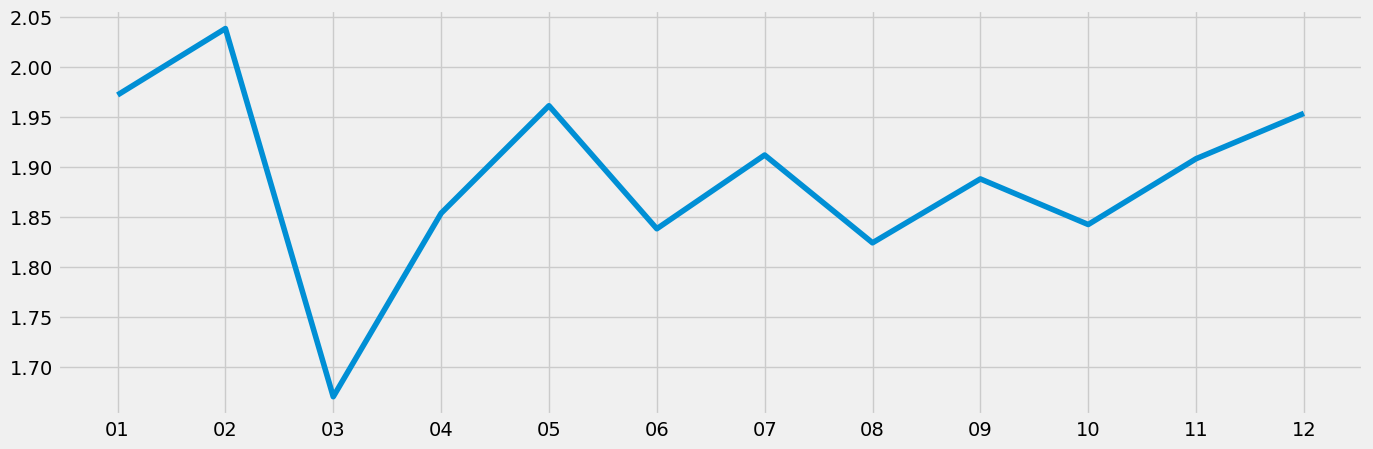

In [44]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df3)

In [45]:
# Decompose the time series using an additive model

#decomposition = sm.tsa.seasonal_decompose(df3, model='additive')
decomp = sm.tsa.seasonal_decompose(df3, freq=6)

In [46]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

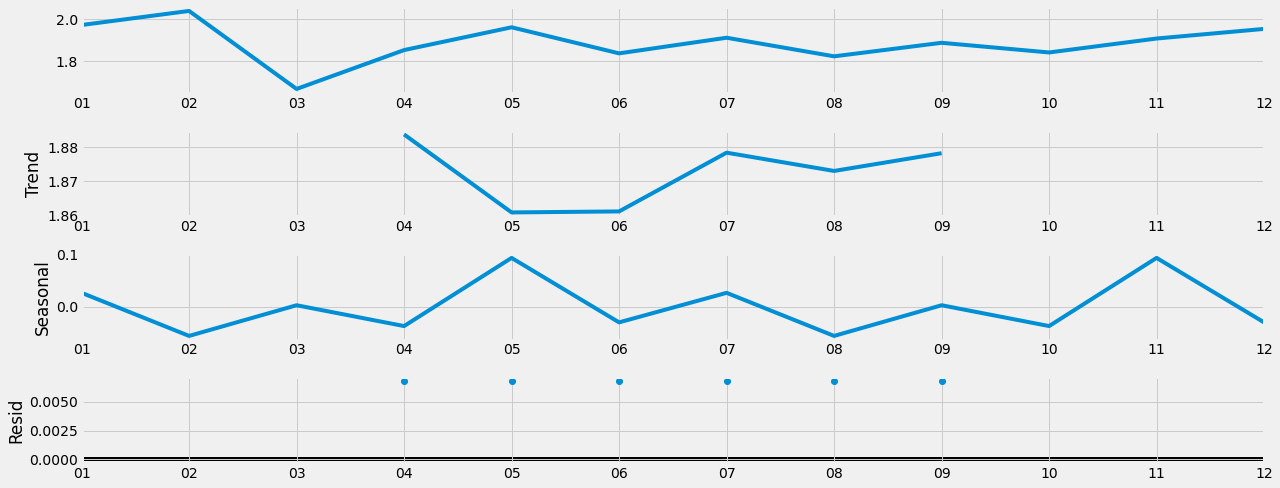

In [47]:
# Plot the separate components

decomp.plot()
plt.show()

### I got unsmoothed data, level and trend differ. not much too say about the seasonality.  noise is pretty small.

In [48]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df3['PriceUSD'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.865
p-value                        0.002
Number of Lags Used            0.000
Number of Observations Used   11.000
Critical Value (1%)           -4.223
Critical Value (5%)           -3.189
Critical Value (10%)          -2.730
dtype: float64


### Test statistic is smaller than critical 5% value =  null hypothesis rejected
### Null hypothesis = Prices don't  increase seasonally

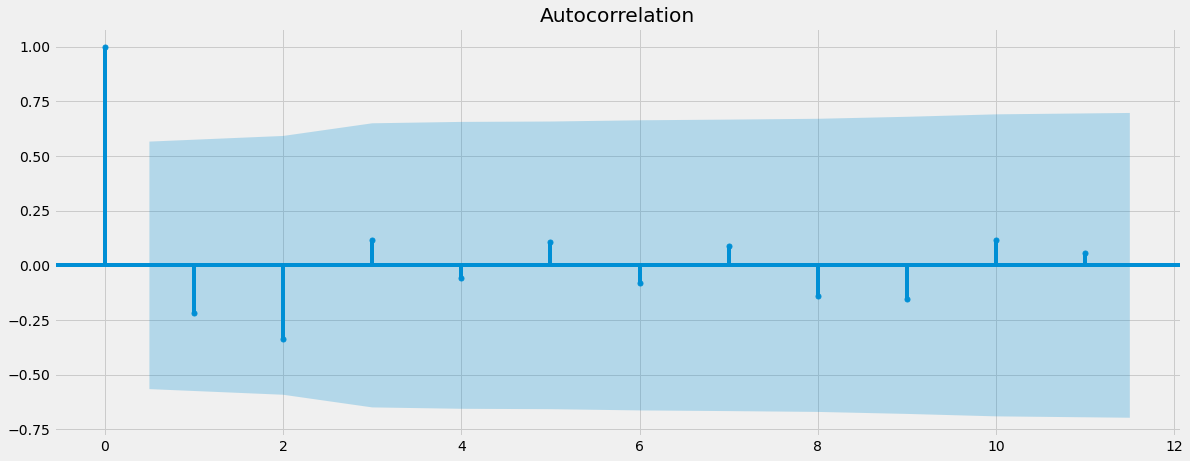

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df3)
plt.show()

# test statistic is smaller than the 5% critical, no further steps needed